In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def veri_yukle(dosya):
    data = pd.read_excel("cleaned_data.xlsx")
    print("Veriler yüklendi")
    print(data.head())
    return data

def veri_incele(data):
    print("\nKayip Degerler:\n", data.isnull().sum())
    print("\nVeri Infosu:")
    print(data.info())
    print("\nVeri Istatistigi:\n", data.describe())

def kayip_degerlerle_ilgilen(data):
    data['Km'].fillna(data['Km'].median(), inplace=True)
    data['hp'].fillna(data['hp'].median(), inplace=True)
    data['year'].fillna(data['year'].median(), inplace=True)
    data.dropna(subset=['price'], inplace=True)
    return data

def aykiri_degerleri_kaldir(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64'])
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    filtered_data = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(f"\nAykiriliklar kaldirildi, kalan veri bicimi: {filtered_data.shape}")
    return filtered_data

def ozellikleri_normalize_et(data, features):
    scaler = StandardScaler()
    data[features] = scaler.fit_transform(data[features])
    print("\nOzellikler normalize edildi")
    print(data.head())
    return data

if __name__ == "__main__":
    dosya = 'cleaned_data.xlsx'
    data = veri_yukle(dosya)
    veri_incele(data)
    data = kayip_degerlerle_ilgilen(data)
    data = aykiri_degerleri_kaldir(data)
    data = ozellikleri_normalize_et(data, ['Km', 'hp', 'year'])
    
    output_file = 'processed_data.xlsx'
    data.to_excel(output_file, index=False)
    print(f"\nVerinin hazirlanmasi tamamlandi. Hazır veri bu sekilde kaydedildi '{output_file}'.")




Veriler yüklendi
                                               Model       Km            gear  \
0  Volkswagen Golf Variant SW 1.6 CR TDi DSG // M...  337.000       Automatic   
1  Volkswagen Golf 1.4 TSI Highline MotorRevisie|...  159.756          Manual   
2  Volkswagen Golf GTI 5p 2.0 tsi dsg 210CV BELLI...  169.914  Semi-automatic   
3  Volkswagen Golf Golf 1.6 TDI 5p. Comfortline B...  170.000          Manual   
4  Volkswagen Golf 1.4 TSI Highline Automaat 122P...  125.278       Automatic   

   year fuel_type   hp   price  
0  2012    Diesel  105   4.500  
1  2013  Gasoline  122   9.999  
2  2012  Gasoline  211  13.990  
3  2013    Diesel  105   8.900  
4  2013  Gasoline  122  11.945  

Kayip Degerler:
 Model        0
Km           0
gear         0
year         0
fuel_type    0
hp           0
price        0
dtype: int64

Veri Infosu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
--

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# verileri on isleme tabi tutan fonksiyon
def veri_onislem(dosya):
    # islenmis veriyi yukle
    data = pd.read_excel("processed_data.xlsx")
    
    # ihtiyacimiz olan ozellikleri ve hedefi belirle
    X = data[['Km', 'hp', 'year']]  # input
    y = data['price']  # hedef

    # datayi train ve test icin bolumle (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Veri on isleme tamamlandi")
    print(f"train verisi icin shape: {X_train.shape}")
    print(f"testing verisi icin shape: {X_test.shape}")

    # bolumlenmis veriyi model trainingi icin returnle
    return X_train, X_test, y_train, y_test

# dosya direkt execute edilirse on islemeyi yap
if __name__ == "__main__":
    X_train, X_test, y_train, y_test = veri_onislem('processed_data.xlsx')

Veri on isleme tamamlandi
train verisi icin shape: (1273, 3)
testing verisi icin shape: (319, 3)


Epoch 1/100


C:\Users\GOK\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 293.1415 - mae: 15.7840 - val_loss: 227.3714 - val_mae: 13.5799
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 201.3736 - mae: 12.6392 - val_loss: 56.9338 - val_mae: 6.4799
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.8687 - mae: 5.2310 - val_loss: 18.1495 - val_mae: 3.4130
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.9578 - mae: 3.3159 - val_loss: 13.9407 - val_mae: 2.9720
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1197 - mae: 2.9614 - val_loss: 11.5680 - val_mae: 2.6777
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.1626 - mae: 2.7201 - val_loss: 9.8012 - val_mae: 2.4329
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7803 - mae: 2.3750 - val_loss: 8.5010 - val_mae: 2.2503
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6802 - mae: 2.2038 - val_loss: 7.5641 - val_mae: 2.1112
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

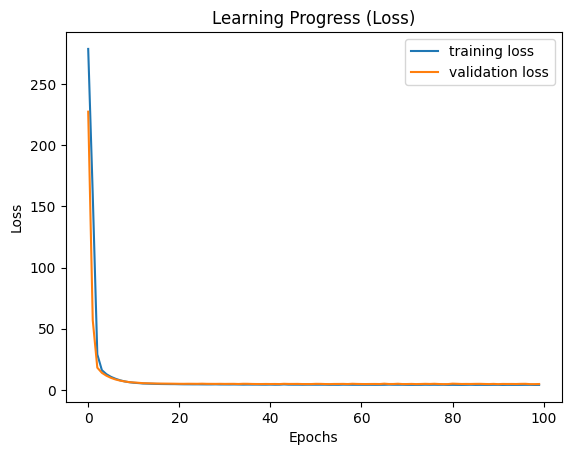

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2730 - mae: 1.5813 
Test kaybı: [4.776244640350342, 1.6725867986679077]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Modelin doğruluk skoru (R^2): 90.14%
Tahmini fiyat: 12.730452537536621, Asil fiyat: 9.7
Tahmini fiyat: 18.15683364868164, Asil fiyat: 14.979
Tahmini fiyat: 25.158283233642578, Asil fiyat: 29.94
Tahmini fiyat: 13.213232040405273, Asil fiyat: 12.9
Tahmini fiyat: 27.215438842773438, Asil fiyat: 22.444

Arabanin ozelliklerini girin:


Arabanin yili:  2022
Arabanin km'sini yazin:  50000
Arabanin beygir gucunu yazin:  120


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Tahmini fiyat: $2194.04


C:\Users\GOK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# on isleme alinmis veriyi yukle
file_path = 'processed_data.xlsx'
data = pd.read_excel(file_path)

# ozellikleri ve hedefi belirle
X = data[['Km', 'hp', 'year']]
y = data['price']

# yine veriyi 80 train 20 test olmak uzere bol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# veriyi normalize et
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# noral neti olustur
def model_insasi():
    model = Sequential()

    # 3 noronlu input katmanı (km, beygir gucu, yil)
    model.add(Dense(64, input_dim=3, activation='relu'))  # 64 neurons in the first hidden layer

    # belirlenmis sayida noron iceren gizli katmanlar eklenmesi, modeli ekstra guclendirmek icin, her katmanda asamli olarak daha gelismis soyutlamalar yapabilecek ancak bu bir hiperparametre ve deneylerle degistirilmeli
    model.add(Dense(32, activation='relu'))  # ikinci gizli layer
    model.add(Dense(16, activation='relu'))  # ucuncu gizli layer
    # hedef olan fiyat tahminlemesi bir norona sahip
    model.add(Dense(1))

    # modeli compile et
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',
    metrics=['mae'])

    return model

# modelin insasini calistir
model = model_insasi()

# egitimini calistir
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Progress (Loss)')
plt.show()

# degerlendir
kayip = model.evaluate(X_test, y_test)
print(f"Test kaybı: {kayip}")

# tahminler
tahminler = model.predict(X_test)

# R^2 skoru hesapla
r2 = r2_score(y_test, tahminler)
print(f"Modelin doğruluk skoru (R^2): {r2 * 100:.2f}%")

# Show a few predictions
for i in range(5):
    print(f"Tahmini fiyat: {tahminler[i][0]}, Asil fiyat: {y_test.iloc[i]}")

# kullanici inputu ile deney
print("\nArabanin ozelliklerini girin:")
yil = float(input("Arabanin yili: "))
kilometre = float(input("Arabanin km'sini yazin: "))
beygirgucu = float(input("Arabanin beygir gucunu yazin: "))

# bu deneyin tek bir data olarak 2b numpy dizisi olarak hazirlanmasi
input_data = np.array([[kilometre, beygirgucu, yil]])

# deney datasinin normalizasyonu
input_data_scaled = scaler.transform(input_data)

# modelimizin deney datasina tahmini
predicted_price = model.predict(input_data_scaled)

# sonucu goster
print(f"Tahmini fiyat: ${predicted_price[0][0]:.2f}")

